In [93]:
#Importing all relevant libraries
import nltk
import pandas as pd
#import string
import re
import pymorphy2
#from collections import Counter
import operator
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Opening and reading source file
df = pd.read_csv("D:\Candidates_texts_values.csv", sep=";")

In [3]:
#Checking if everything is opened correctly
df.head()

,No,Name_ENG,Last_name,First_name,Father_name,File_path
0,1,Balashov Hennadii Viktorovych,Balashov,Hennadii,Viktorovych,D:\election_classifier\programs\output2\balash...
1,2,Bezsmertnyi Roman Petrovych,Bezsmertnyi,Roman,Petrovych,D:\election_classifier\programs\output2\bezsme...
2,3,Bohomolets Olha Vadymivna,Bohomolets,Olha,Vadymivna,D:\election_classifier\programs\output2\bohomo...
3,4,Bohoslovska Inna Hermanivna,Bohoslovska,Inna,Hermanivna,D:\election_classifier\programs\output2\bohosl...
4,5,Boiko Yurii Anatoliiovych,Boiko,Yurii,Anatoliiovych,D:\election_classifier\programs\output2\boiko-...


In [4]:
#Creating list of file paths to upload texts to dataframe
flist = df['File_path'].tolist()

In [5]:
#Cleaning and uploading texts of election programmes to list 'pr_text'
pr_text = []
for i in range(len(flist)):
    w = open(flist[i], encoding='utf8')
    raw2 = w.read()
    raw2 = raw2.replace("\n", " ")
    #Replacing all irrelevant symbols with spaces. 
    #I had issues with complex regular expressions to delete all irrelevant symbols 
    #at once - it just left some of them in the text...
    #Perhaps this is an encoding issue. anyway the task isn't that heavy, so I left it as it is.
    raw2 = raw2.lower()
    raw2 = raw2.replace("_", "")
    raw2 = re.sub(r'[0-9]',' ', raw2)
    raw2 = re.sub(r'$',' ', raw2)
    raw2 = re.sub(r'%',' ', raw2)
    raw2 = re.sub(r'«',' ', raw2)
    raw2 = re.sub(r'»',' ', raw2)
    raw2 = raw2.replace(" передвиборна","передвиборна")
    raw2 = raw2.replace("'","")
    raw2 = raw2.replace("’","")
    raw2 = raw2.replace("."," ")
    raw2 = raw2.replace(","," ")
    raw2 = raw2.replace(":"," ")
    raw2 = raw2.replace(";"," ")
    raw2 = raw2.replace("$"," ")
    raw2 = raw2.replace("-"," ")
    raw2 = raw2.replace("—"," ")
    raw2 = raw2.replace("("," ")
    raw2 = raw2.replace(")"," ")
    raw2 = raw2.replace(u'\xa0', " ")
    raw2 = raw2.replace("•"," ")
    raw2 = raw2.replace("●"," ")
    raw2 = raw2.replace("!"," ")
    raw2 = raw2.replace("?"," ")
    raw2 = raw2.replace("–"," ")
    raw2 = raw2.replace("*"," ")
    pr_text.append(raw2)


In [6]:
#Checking if all the texts have been added to list. Should be 44
len(pr_text)


44

In [7]:
#Adding data from 'pr_text' to dataframe as 'Pr_text_no_punct' (programme text - no punctuation) and checking if successful
df['Pr_text_no_punct'] = pd.Series(pr_text)
df['Pr_text_no_punct'].head()

0    ﻿передвиборна програма кандидата на пост прези...
1    ﻿передвиборна програма  кандидата на пост през...
2    ﻿передвиборна програма  кандидата на пост през...
3    ﻿програма кандидата в президенти україни  бого...
4    ﻿передвиборна програма кандидата на пост прези...
Name: Pr_text_no_punct, dtype: object

In [8]:
#Tokenizing each programme separately
df['Tokenized_words'] = df.apply(lambda row: nltk.word_tokenize(row['Pr_text_no_punct']), axis=1)

In [9]:
print(df['Tokenized_words'].head())

0    [﻿передвиборна, програма, кандидата, на, пост,...
1    [﻿передвиборна, програма, кандидата, на, пост,...
2    [﻿передвиборна, програма, кандидата, на, пост,...
3    [﻿програма, кандидата, в, президенти, україни,...
4    [﻿передвиборна, програма, кандидата, на, пост,...
Name: Tokenized_words, dtype: object


In [10]:
#Exctracting word tokenized programmes to list to ease further iterations 
progs_w_tokenized = df['Tokenized_words'].tolist()

print(len(progs_w_tokenized))

44


In [12]:
#Creating function to normalize words in list
def word_normalizer(word_list):
    morph = pymorphy2.MorphAnalyzer(lang='uk')
    normalized_list = []
    for token in word_list:
        token = morph.parse(token)[0].normal_form
        normalized_list.append(token)
    return(normalized_list)

word_normalizer(progs_w_tokenized[5])

['\ufeffпередвиборний',
 'програма',
 'кандидат',
 'на',
 'пост',
 'президент',
 'україна',
 'бондарь',
 'віктор',
 'васильович',
 'україна',
 'потребувати',
 'відродження',
 'рік',
 'незалежність',
 'україна',
 'рік',
 'втрачений',
 'надія',
 'україна',
 'раз',
 'з',
 'незалежність',
 'отримати',
 'неймовірний',
 'промисловий',
 'енергетичний',
 'транспортний',
 'транзитний',
 'освітянський',
 'і',
 'науковий',
 'потенціал',
 'на',
 'жаль',
 'замість',
 'модель',
 'процвітання',
 'потужний',
 'зростання',
 'економіка',
 'і',
 'підвищення',
 'добробут',
 'населення',
 'влад',
 'запропонувати',
 'ми',
 'політик',
 'пограбування',
 'люди',
 'і',
 'держава',
 'ми',
 'рік',
 'використовувати',
 'обкрадати',
 'і',
 'знищувати',
 'ми',
 'рік',
 'навязувати',
 'аграрно',
 'сировинний',
 'модель',
 'розвиток',
 'економіка',
 'що',
 'притаманний',
 'найбідніший',
 'країна',
 'світ',
 'мій',
 'мета',
 'відродження',
 'україна',
 'як',
 'сучасний',
 'економічно',
 'розвинений',
 'держава',
 'в',


In [13]:
#Normalizing each word token of every programme and creating new list where each programme consists of tokenized words
progs_w_tokenized_norm = []
for programme in progs_w_tokenized:
    progs_w_tokenized_norm.append(word_normalizer(programme))
        

In [14]:
#Adding the list of stopwords to be removed
stopwords = [
'і',
"в",
"г",
"е",
"ж",
"з",
"м",
"т",
"у",
"я",
"є",
"і",
"аж",
"ви",
"де",
"до",
"за",
"зі",
"ми",
"на",
"не",
"ну",
"нх",
"ні",
"по",
"та",
"ти",
"то",
"ту",
"ті",
"це",
"цю",
"ця",
"ці",
"чи",
"ще",
"що",
"як",
"їй",
"їм",
"їх",
"її",
"або",
"але",
"ало",
"без",
"був",
"вам",
"вас",
"ваш",
"вже",
"все",
"всю",
"вся",
"від",
"він",
"два",
"дві",
"для",
"ким",
"мож",
"моя",
"моє",
"мої",
"міг",
"між",
"мій",
"над",
"нам",
"нас",
"наш",
"нею",
"неї",
"них",
"ніж",
"ній",
"ось",
"при",
"про",
"під",
"пір",
"раз",
"рік",
"сам",
"сих",
"сім",
"так",
"там",
"теж",
"тим",
"тих",
"той",
"тою",
"три",
"тут",
"хоч",
"хто",
"цей",
"цим",
"цих",
"час",
"щоб",
"яка",
"які",
"адже",
"буде",
"буду",
"будь",
"була",
"були",
"було",
"бути",
"вами",
"ваша",
"ваше",
"ваші",
"весь",
"вниз",
"вона",
"вони",
"воно",
"всею",
"всім",
"всіх",
"втім",
"геть",
"далі",
"двох",
"день",
"дуже",
"зате",
"його",
"йому",
"каже",
"кого",
"коли",
"кому",
"крім",
"куди",
"лише",
"люди",
"мало",
"мати",
"мене",
"мені",
"миру",
"мною",
"може",
"нами",
"наша",
"наше",
"наші",
"ними",
"ніби",
"один",
"поки",
"пора",
"рано",
"року",
"році",
"сама",
"саме",
"саму",
"самі",
"свою",
"своє",
"свої",
"себе",
"собі",
"став",
"суть",
"така",
"таке",
"такі",
"твоя",
"твоє",
"твій",
"тебе",
"тими",
"тобі",
"того",
"тоді",
"тому",
"туди",
"хоча",
"хіба",
"цими",
"цієї",
"часу",
"чого",
"чому",
"який",
"яких",
"якої",
"якщо",
"ім'я",
"інша",
"інше",
"інші",
"буває",
"будеш",
"більш",
"вгору",
"вміти",
"внизу",
"вісім",
"давно",
"даром",
"добре",
"довго",
"друго",
"дякую",
"життя",
"зараз",
"знову",
"какая",
"кожен",
"кожна",
"кожне",
"кожні",
"краще",
"ледве",
"майже",
"менше",
"могти",
"можна",
"назад",
"немає",
"нижче",
"нього",
"однак",
"п'ять",
"перед",
"поруч",
"потім",
"проти",
"після",
"років",
"самим",
"самих",
"самій",
"свого",
"своєї",
"своїх",
"собою",
"справ",
"такий",
"також",
"тепер",
"тисяч",
"тобою",
"треба",
"трохи",
"усюди",
"усіма",
"хочеш",
"цього",
"цьому",
"часто",
"через",
"шість",
"якого",
"іноді",
"інший",
"інших",
"багато",
"будемо",
"будете",
"будуть",
"більше",
"всього",
"всьому",
"далеко",
"десять",
"досить",
"другий",
"дійсно",
"завжди",
"звідси",
"зовсім",
"кругом",
"кілька",
"людина",
"можуть",
"навіть",
"навіщо",
"нагорі",
"небудь",
"низько",
"ніколи",
"нікуди",
"нічого",
"обидва",
"одного",
"однієї",
"п'ятий",
"перший",
"просто",
"раніше",
"раптом",
"самими",
"самого",
"самому",
"сказав",
"скрізь",
"сьомий",
"третій",
"тільки",
"хотіти",
"чотири",
"чудово",
"шостий",
"близько",
"важлива",
"важливе",
"важливі",
"вдалині",
"восьмий",
"говорив",
"дев'ять",
"десятий",
"зайнята",
"зайнято",
"зайняті",
"занадто",
"значить",
"навколо",
"нарешті",
"нерідко",
"повинно",
"посеред",
"початку",
"пізніше",
"сказала",
"сказати",
"скільки",
"спасибі",
"частіше",
"важливий",
"двадцять",
"дев'ятий",
"зазвичай",
"зайнятий",
"звичайно",
"здається",
"найбільш",
"не можна",
"недалеко",
"особливо",
"потрібно",
"спочатку",
"сьогодні",
"численна",
"численне",
"численні",
"відсотків",
"двадцятий",
"звідусіль",
"мільйонів",
"нещодавно",
"прекрасно",
"четвертий",
"численний",
"будь ласка",
"дванадцять",
"одинадцять",
"сімнадцять",
"тринадцять",
"безперервно",
"дванадцятий",
"одинадцятий",
"одного разу",
"п'ятнадцять",
"сімнадцятий",
"тринадцятий",
"шістнадцять",
"вісімнадцять",
"п'ятнадцятий",
"чотирнадцять",
"шістнадцятий",
"вісімнадцятий",
"дев'ятнадцять",
"чотирнадцятий",
"дев'ятнадцятий",
"''",
'+',
'/',
'//derevyanko',
'``',
'g',
'gst',
'https',
'i',
'ii',
'iii',
'io/program',
'iv',
'lng',
'pit',
'v',
'xxi',
'а',
'аби',
'або',
'бер',
'про',
'◦',
'фап',
'с',
'``',
'ь',
'січа',
'аби',
'або',
'але',
'ан',
'ані',
'б',
'без',
'би',
'бо',
'бута',
'бути',
'біля',
'в',
'\xad',
'ви',
'вона',
'вони',
'від',
'він',
'д',
'де',
'для', 
'до',
'діл',
'з', 
'за',
'зво',
'й',
'ймовірністьвїзд',
'й',
'км',
'л',
'лі',
'н',
'на',
'нью',
'о',
'об',
'отже',
'п',
'па',
'пов',
'поза',
'про',
'проти',
'проте',
'т',
'та',
'таки',
'такий',
'також', 
'точно',
'тощо',
'у',
'уже',
'усе',
'чи', 
'чий',
'чиї',
'ще', 
'що', 
'щоб',
'щоби',
'як', 'якби', 'який', 'якийсь', 'яким', 
'якомога',
'якій',
'і',
'їх',
'їхній',
'її',
'із',
'інший',
'іще',
'її',
'‒', 
'‘',
'“',
'”', 
'№',
'◦', 
'\ufeff', 
'\ufeffзахистити', 
'\ufeffновий', 
'\ufeffпередвиборний', 
'\ufeffпередвиборчий',
'\ufeffпрограма',
'\ufeffпроект', 
'\ufeffчерговий',
'\ufeffюрій',
'\ufeffігор',
'та',
'/', 
'//derevyanko',]


In [15]:
#Creating function to remove stopwords from each programme
def stopwords_remove(tokenized_list):
    for x in tokenized_list:
        if x in stopwords:
            tokenized_list.remove(x)

In [16]:
#Deleting stopwords in every programme
for programme in progs_w_tokenized_norm:
    programme = stopwords_remove(programme)

In [18]:
#let's create one flat list containing all tokens from programmes
flat_token_list = [item for sublist in progs_w_tokenized_norm for item in sublist]

#Creating list of unique tokens to find more stopwords
unique_flat_token_list = set(flat_token_list)

In [76]:
#Creating function that counts tokens and displays them along with their count values as a tuple
def tokencounter(token_list):
    token_counter = {}
    for token in token_list:
        token_counter[token] = token_list.count(token)
        sorted_tokens = sorted(token_counter.items(), key=operator.itemgetter(1), reverse = True)
    return(sorted_tokens[:10])

tokencounter(progs_w_tokenized_norm[40])

[('новий', 24),
 ('україна', 18),
 ('український', 17),
 ('програма', 10),
 ('держава', 10),
 ('заробітний', 9),
 ('плата', 9),
 ('стратегія', 8),
 ('мир', 7),
 ('політик', 7)]

In [91]:
#Creating list of tuples with top ten counted words from every election programme
top_words = []
for i in range (len(progs_w_tokenized_norm)):
    token_tuples = tokencounter(progs_w_tokenized_norm[i])
    top_words.append(token_tuples)
top_words

[[('україна', 50),
  ('громадянин', 38),
  ('система', 18),
  ('податковий', 13),
  ('гріш', 11),
  ('рай', 10),
  ('світ', 10),
  ('земля', 10),
  ('збагачення', 9),
  ('держава', 8)],
 [('держава', 31),
  ('україна', 16),
  ('система', 11),
  ('великий', 9),
  ('державний', 7),
  ('цінність', 7),
  ('програма', 6),
  ('мета', 6),
  ('бути', 6),
  ('створення', 6)],
 [('справедливий', 19),
  ('україна', 14),
  ('країна', 12),
  ('держава', 11),
  ('медичний', 10),
  ('забезпечити', 9),
  ('запровадити', 9),
  ('розвиток', 8),
  ('президент', 7),
  ('соціальний', 7)],
 [('україна', 30),
  ('громадянин', 19),
  ('державний', 15),
  ('український', 12),
  ('президент', 11),
  ('земля', 10),
  ('політичний', 9),
  ('новий', 8),
  ('система', 7),
  ('публічний', 7)],
 [('україна', 17),
  ('забезпечити', 14),
  ('громадянин', 11),
  ('розвиток', 9),
  ('держава', 8),
  ('повернути', 7),
  ('економіка', 7),
  ('державний', 6),
  ('зупинити', 6),
  ('право', 5)],
 [('будівництво', 14),
  ('за

In [92]:
#Implementing the above mentioned list into our dataframe
df['Top_words'] = pd.Series(top_words)
print(df['Top_words'].head())

0    [(україна, 50), (громадянин, 38), (система, 18...
1    [(держава, 31), (україна, 16), (система, 11), ...
2    [(справедливий, 19), (україна, 14), (країна, 1...
3    [(україна, 30), (громадянин, 19), (державний, ...
4    [(україна, 17), (забезпечити, 14), (громадянин...
Name: Top_words, dtype: object


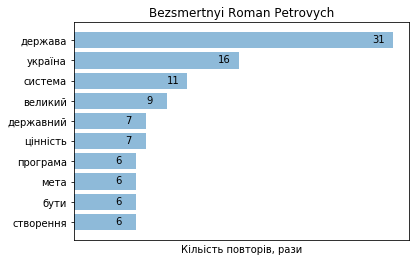

In [136]:
#Creating function to plot word counts
def plot_batcahart(list_of_tuples, candidate):
    objects = [x[0] for x in list_of_tuples]
    y_pos = np.arange(len(objects))
    performance = [x[1] for x in list_of_tuples]
 
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.tick_params(axis='x', which='both',bottom = False, top=False, labelbottom=False)
    for i in range(len(objects)):
        plt.text(x = performance[i]-2 , y = y_pos[i]+0.1, s = performance[i], size = 10)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.xlabel('Кільість повторів, рази')
    plt.title(candidate)
 
    plt.show()
plot_batcahart(df['Top_words'][1], df['Name_ENG'][1])

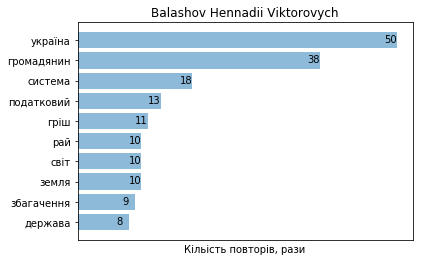

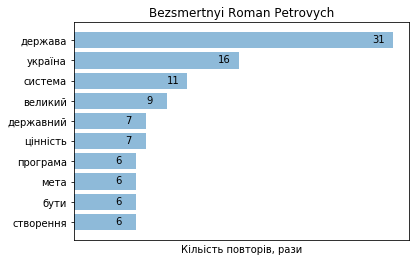

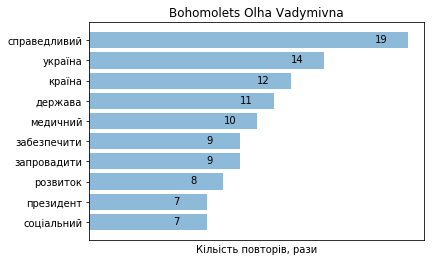

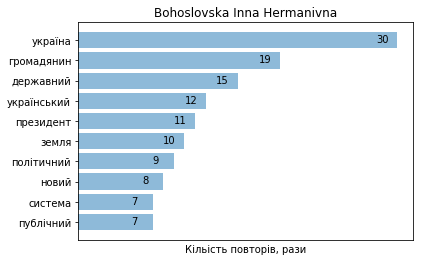

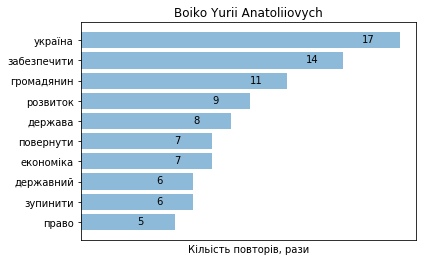

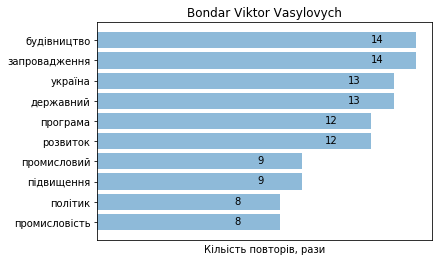

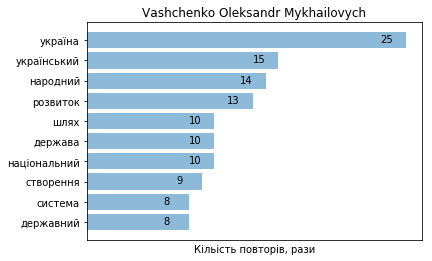

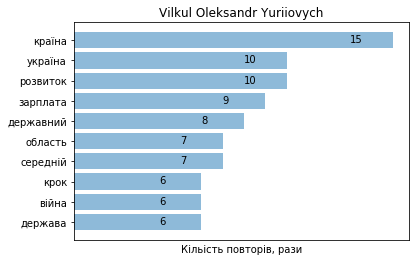

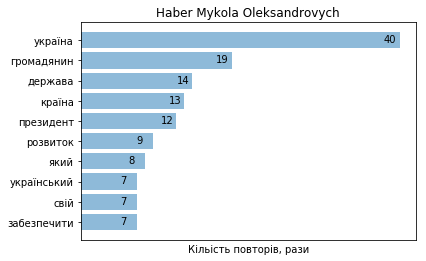

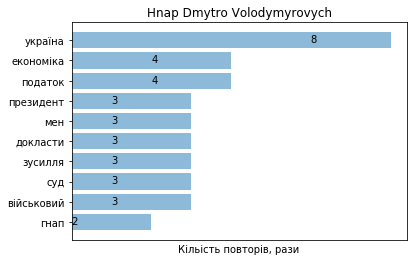

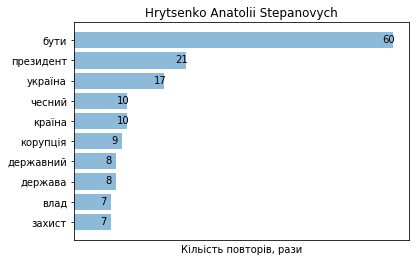

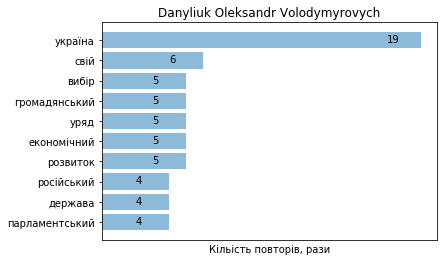

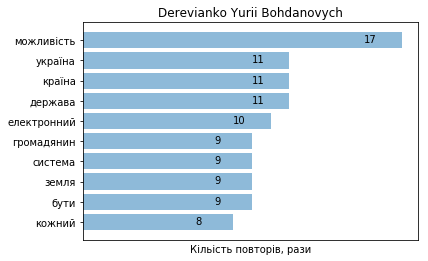

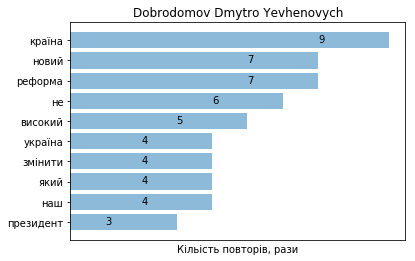

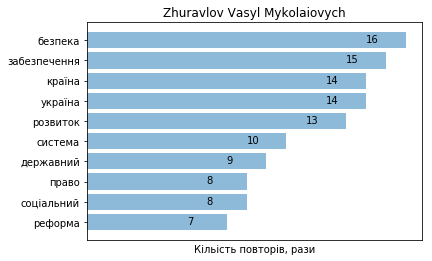

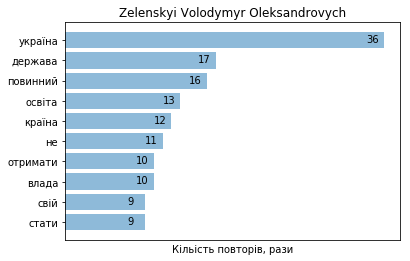

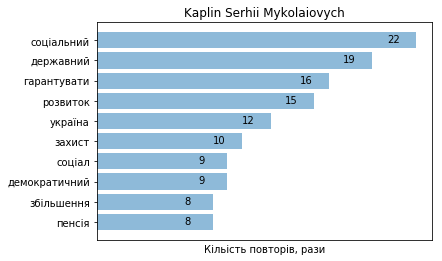

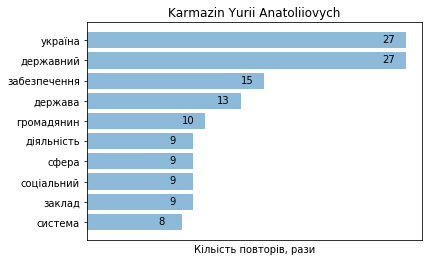

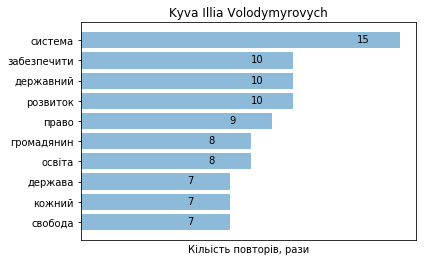

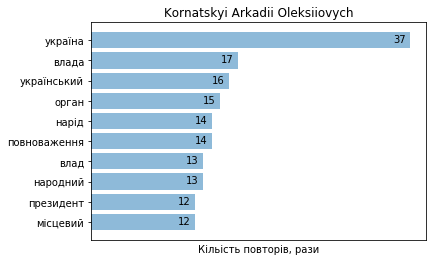

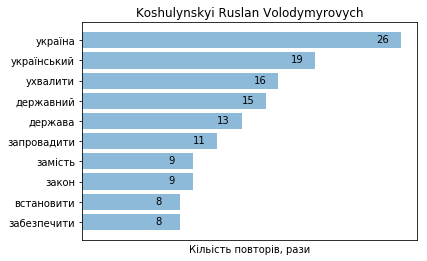

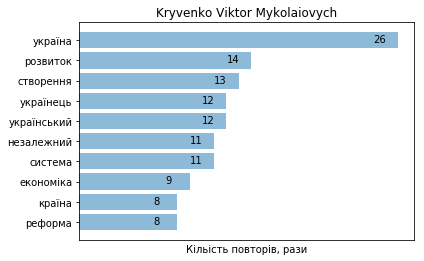

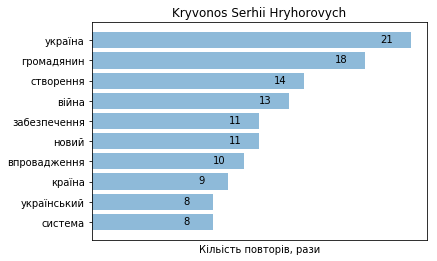

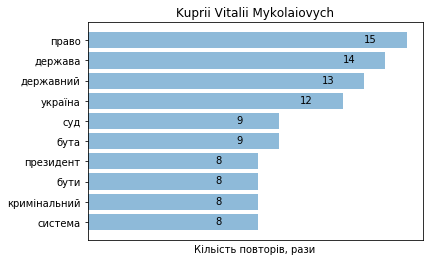

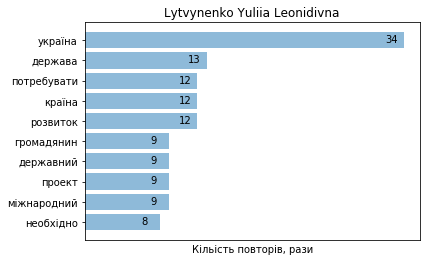

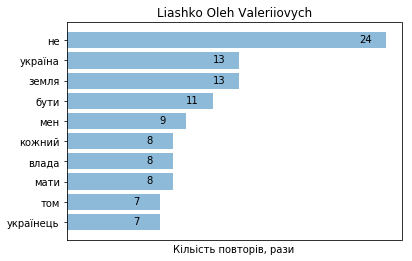

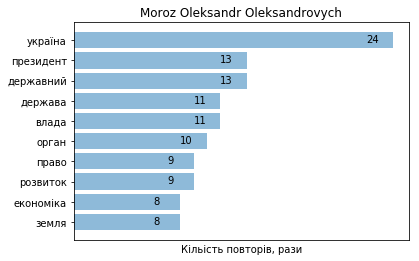

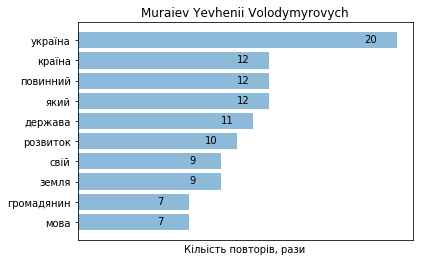

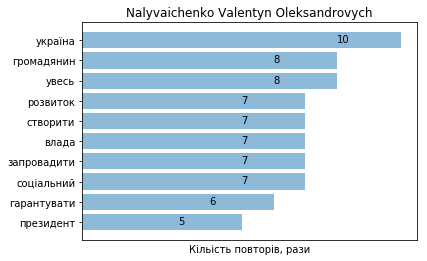

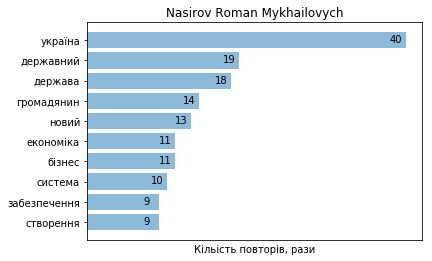

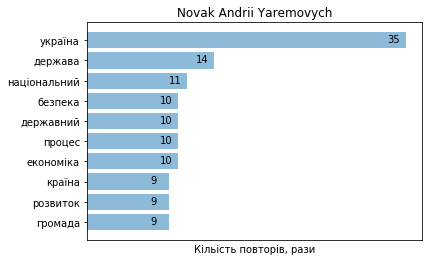

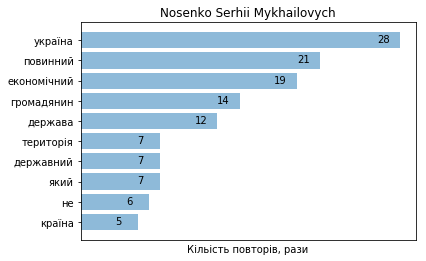

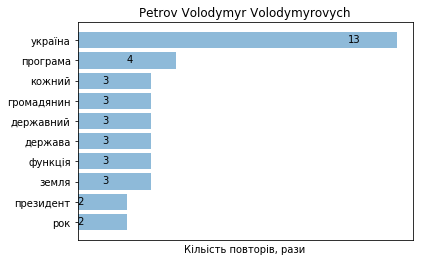

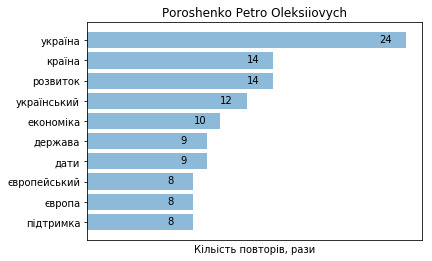

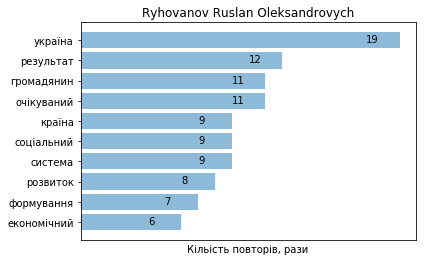

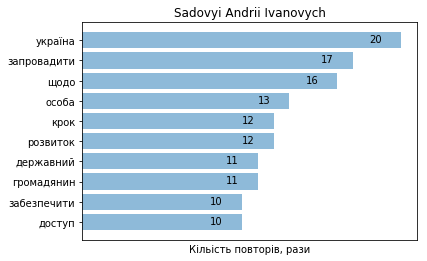

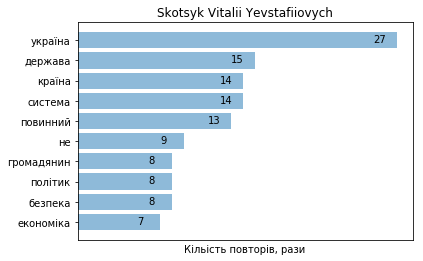

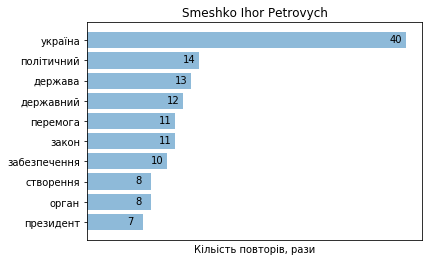

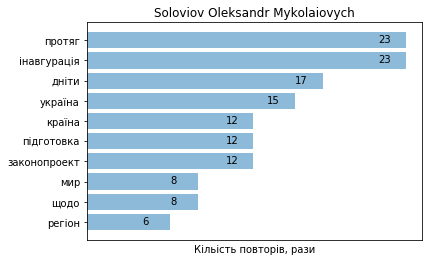

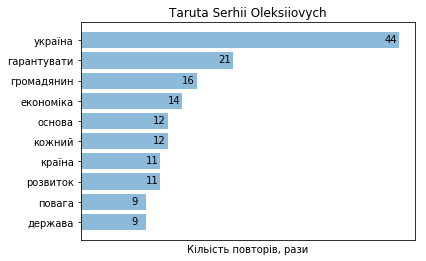

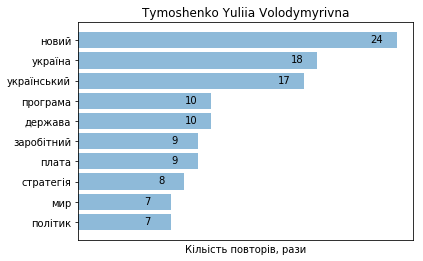

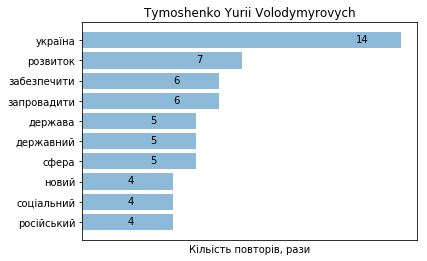

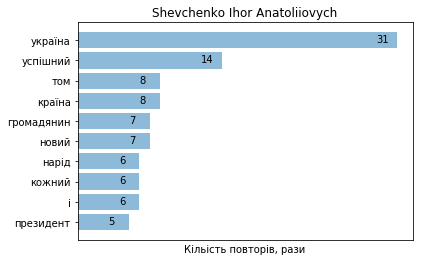

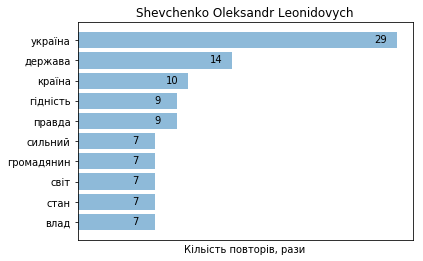

In [137]:
#Iterating through the dataset and visualizing data. As we can see, there are some stopwords left, 
#however they do not make that much influence
for x in range (len (df)):
    plot_batcahart(df['Top_words'][x], df['Name_ENG'][x])

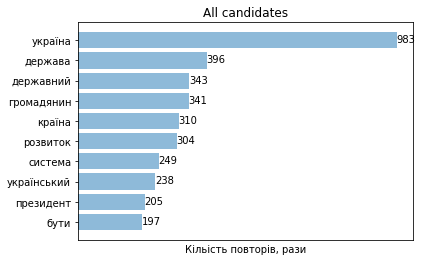

In [139]:
#Plotting the same of all candidates at once
all_combined = tokencounter(flat_token_list)

plot_batcahart(all_combined, 'All candidates')